# Assignment 4-2 Image Processing

In [1]:
import cv2 # workswith images 
from matplotlib import pyplot # for visualisation

import numpy as np

import skimage.measure

ERROR: Could not find a version that satisfies the requirement opencv-python==3.4.2.17
ERROR: No matching distribution found for opencv-python==3.4.2.17


## Load your image here with preferred color conversion

In [20]:
# load your image, 0 is for greyscale mode
img = cv2.imread('Images/Mario2.jpg', 0)

#Older version of opencv does not support the below color conversions and are not needed anyway
#img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
#img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

### Methods

In [3]:
# visualisation function with forced grayscale
def myimage(image):
    # image view
    #pyplot.imshow(image)
    pyplot.imshow(img, cmap="gray", vmin=0, vmax=255)# pixel view with grayscale
    print('image size: ', image.shape)
    print('pixel matrix:\n', image)

In [4]:
# visualisation function with color
def myimagecolor(image):
    # image view
    pyplot.imshow(image)
    #pyplot.imshow(img, cmap="gray", vmin=0, vmax=255)# pixel view with grayscale
    print('image size: ', image.shape)
    print('pixel matrix:\n', image)

In [5]:
def convolve2D(image, kernel, padding=0, strides=1):
    # Cross Correlation
    kernel = np.flipud(np.fliplr(kernel))

    # Gather Shapes of Kernel + Image + Padding
    xKernShape = kernel.shape[0]
    yKernShape = kernel.shape[1]
    xImgShape = image.shape[0]
    yImgShape = image.shape[1]

    # Shape of Output Convolution
    xOutput = int(((xImgShape - xKernShape + 2 * padding) / strides) + 1)
    yOutput = int(((yImgShape - yKernShape + 2 * padding) / strides) + 1)
    output = np.zeros((xOutput, yOutput))

    # Apply Equal Padding to All Sides
    if padding != 0:
        imagePadded = np.zeros((image.shape[0] + padding*2, image.shape[1] + padding*2))
        imagePadded[int(padding):int(-1 * padding), int(padding):int(-1 * padding)] = image
        print(imagePadded)
    else:
        imagePadded = image

    # Iterate through image
    for y in range(image.shape[1]):
        # Exit Convolution
        if y > image.shape[1] - yKernShape:
            break
        # Only Convolve if y has gone down by the specified Strides
        if y % strides == 0:
            for x in range(image.shape[0]):
                # Go to next row once kernel is out of bounds
                if x > image.shape[0] - xKernShape:
                    break
                try:
                    # Only Convolve if x has moved by the specified Strides
                    if x % strides == 0:
                        output[x, y] = (kernel * imagePadded[x: x + xKernShape, y: y + yKernShape]).sum()
                except:
                    break

    return output

### Run

image size:  (487, 999)
pixel matrix:
 [[255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 ...
 [255 255 255 ... 252 254 255]
 [255 255 255 ... 254 255 255]
 [255 255 255 ... 255 255 252]]


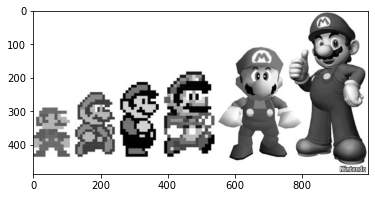

In [6]:
# show the original image
myimage(img)

image size:  (487, 999)
pixel matrix:
 [[255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 ...
 [255 255 255 ... 252 254 255]
 [255 255 255 ... 254 255 255]
 [255 255 255 ... 255 255 252]]


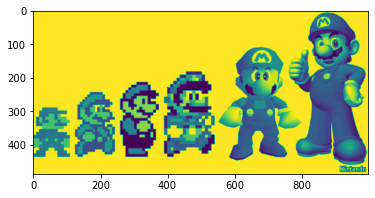

In [7]:
# show the original image with color
myimagecolor(img)

In [8]:
# resize the image
SIZE = 32
img = cv2.resize(img, (SIZE,SIZE))

image size:  (32, 32)
pixel matrix:
 [[255 255 255 ... 253 255 255]
 [255 255 255 ... 189 255 255]
 [255 255 255 ...  66 254 255]
 ...
 [255 255 254 ...  85  36  46]
 [255 255 255 ... 122 249 190]
 [255 255 255 ... 103  40  59]]


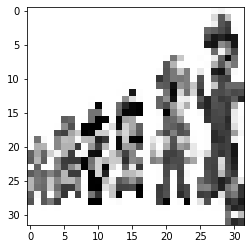

In [9]:
# show the resized image
myimage(img)

image size:  (32, 32)
pixel matrix:
 [[255 255 255 ... 253 255 255]
 [255 255 255 ... 189 255 255]
 [255 255 255 ...  66 254 255]
 ...
 [255 255 254 ...  85  36  46]
 [255 255 255 ... 122 249 190]
 [255 255 255 ... 103  40  59]]


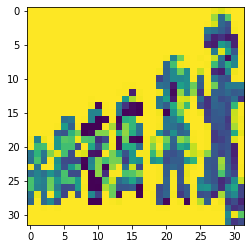

In [10]:
# show the resized image in color
myimagecolor(img)

### a)

In [11]:
# Take the image which is at 32 by 32 pixels and randomize the color values
cv2.randu(img, 0, 255) 
# This creates the matrix the assignment asks for

array([[ 91,   2,  79, ..., 197, 191, 196],
       [ 40,   7, 243, ...,  81, 118, 187],
       [167, 140, 218, ...,  72, 168, 109],
       ...,
       [ 23, 209, 141, ..., 191, 156,  30],
       [ 98, 141, 243, ..., 167,  36,  56],
       [253, 152, 240, ...,   8,  23,  48]], dtype=uint8)

image size:  (32, 32)
pixel matrix:
 [[ 91   2  79 ... 197 191 196]
 [ 40   7 243 ...  81 118 187]
 [167 140 218 ...  72 168 109]
 ...
 [ 23 209 141 ... 191 156  30]
 [ 98 141 243 ... 167  36  56]
 [253 152 240 ...   8  23  48]]


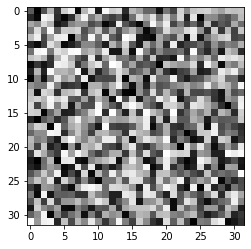

In [12]:
myimage(img)

image size:  (32, 32)
pixel matrix:
 [[ 91   2  79 ... 197 191 196]
 [ 40   7 243 ...  81 118 187]
 [167 140 218 ...  72 168 109]
 ...
 [ 23 209 141 ... 191 156  30]
 [ 98 141 243 ... 167  36  56]
 [253 152 240 ...   8  23  48]]


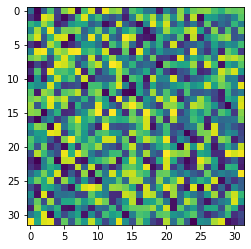

In [13]:
myimagecolor(img)

### b)

In [14]:
kernelHorizontal = np.array([[-1, -1, -1],
                           [2, 2, 2],
                           [-1, -1, -1]])

In [15]:
kernelVertical = np.array([[-1, 2, -1],
                           [-1, 2, -1],
                           [-1, 2, -1]])

In [16]:
kernelEdges = np.array([[-1, -1, -1], [-1, 8, -1], [-1, -1, -1]])

At this point, rewrite the method call to get the output image you want to see. <br>
Alternatively refresh the img variable with whatever image you want to work on. <br>
We chose to work on the Mario2.jpg and so we ran that cell up top again.

In [21]:
# Convolve and Save Output
#pyplot.imshow(convolve2D(img, kernelHorizontal, 0), cmap="gray", vmin=0, vmax=255)
output = convolve2D(img, kernelEdges, 0)
cv2.imwrite('Output/2DConvolvedEdgesNEW.jpg', output)

True

### c) & d) <br>
Husk at refreshe din img variabel på det du vil teste på.

image size:  (16, 16)
pixel matrix:
 [[ 91 243 205 236 242 248 218 183 221 224 208 214 229 211 197 196]
 [220 248 202 212 150 198 238 181 118 246 237 217 237 207 182 197]
 [239 223 240 151 246 238 179 252 178 166 237 188 230 167 216 176]
 [246 252 241 253 234 236 215 191 248 199  95 245 251 182 237 229]
 [183 248 243 247 198 230 254 179 152 158 194 151 216 241 235 238]
 [147 239 232 183 236 176 243 181 159 230 241 173 147 233 213 245]
 [210 247 234 230 187 212 251 209 148 237 242 181 218 159 167 235]
 [216 242 211 160 206 254 254 251 252 190 252 167 229 178 183 241]
 [209 199 245 240 176 251 167 203 238 196 222  96 200 240 104 200]
 [184 246 240 253 186 236 237 225 230 200 248 127 200 239 208 112]
 [226 198 247 247 201 217 174 232 220 152 254 226 230 140 252 249]
 [ 37 182 230 234 233 190 219 236 247 157 239  99 244 213 165 158]
 [197 225 239 137 213 185 238 234 221 212 196 240 165 237 113 252]
 [121 242 109 166 249 230 217 233 237 226 246 151 243 231 196 234]
 [209 217 161 190 172 232

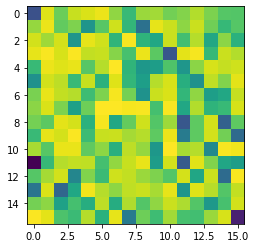

In [18]:
myimagecolor(skimage.measure.block_reduce(img, (2,2), np.max))

Husk at ændre output navnet, hvis du ønsker ikke at overskrive den forrige fil.

In [22]:
cv2.imwrite('Output/2DMaxPoolLARGENEW.jpg', skimage.measure.block_reduce(img, (2,2), np.max))

True